In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from scipy import stats
import statsmodels.api as sm

**Figure 4A**

In [24]:
df=pd.read_csv('common_data/Sleuth_results_all.txt')
df=df.sort_values(by='qval')
df=df[df.ens_gene.astype(str)!='nan']
df.b=-1*df.b
df['log_qval']=-np.log10(df.qval+10e-150)
df_abundance=pd.read_pickle('common_data/Kallisto_abundance.pkl')

In [25]:
mhc2=['HLA-DQA1', 'HLA-DQA2', 'HLA-DQB1', 'HLA-DQB2', 'HLA-DQB3','HLA-DRA', 'HLA-DRB1', 'HLA-DRB2', 'HLA-DRB3', 'HLA-DRB4',
       'HLA-DRB5', 'HLA-DRB6', 'HLA-DRB7', 'HLA-DRB8', 'HLA-DRB9']

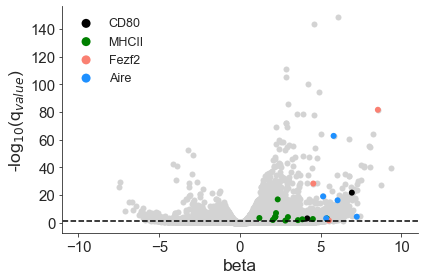

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='b',y='log_qval',data=df,color='lightgray',linewidth=0)
sns.scatterplot(x='b',y='log_qval',data=df[(df.qval<=0.05) & (abs(df.b)>1) & (df.ext_gene=='CD80')],color='k',edgecolor="none",label='CD80',rasterized=True)
sns.scatterplot(x='b',y='log_qval',data=df[(df.qval<=0.05) & (abs(df.b)>1) & (df.ext_gene.isin(mhc2))],color='green',edgecolor="none",label='MHCII',rasterized=True)
sns.scatterplot(x='b',y='log_qval',data=df[(df.qval<=0.05) & (abs(df.b)>1) & (df.ext_gene=='FEZF2')],color='salmon',edgecolor="none",label='Fezf2',rasterized=True)
sns.scatterplot(x='b',y='log_qval',data=df[(df.qval<=0.05) & (abs(df.b)>1) & (df.ext_gene=='AIRE')],color='dodgerblue',edgecolor="none",label='Aire',rasterized=True)
plt.plot([-15,15],[-np.log10(0.05),-np.log10(0.05)],'--k')
plt.xlim([-11,11])
plt.ylabel('-log$_{10}$(q$_{value}$)',fontsize=17.5)
plt.xlabel('beta',fontsize=17.5)
plt.xticks([-10,-5,0,5,10],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=False,fontsize=12.5,loc='upper left',markerscale=1.5)
sns.despine()
plt.tight_layout()
plt.show()
plt.close()

**Figure 4B**

In [27]:
x=df[df.ext_gene.isin(np.hstack(('AIRE','FEZF2',mhc2)))]
x=x[x.qval.astype(str)!='nan']
x=df[df.ext_gene.isin(np.hstack(('AIRE','FEZF2','CD80',mhc2)))]
x=x[x.qval.astype(str)!='nan']
x['Gene']=[x if x[:3]!='HLA' else 'MHCII' for x in x.ext_gene]
for i,gene in enumerate(x.Gene.unique()):
    y=df_abundance.loc[x[x.Gene.isin([gene])].target_id]
    y=y.drop(columns='length')
    y['Gene']=[gene]*y.shape[0]
    y=y.melt(id_vars='Gene')
    y['Subject']=np.array([x.split('_')[0] for x in y.variable])
    y['Condition']=np.array([x.split('_')[1] for x in y.variable])
    y.value=y.value+0.01
    if i==0:
        z=y
    else:
        z=z.append(y)

/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_13564/2801561977.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(y)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_13564/2801561977.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(y)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_13564/2801561977.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(y)


In [28]:
round(stats.mannwhitneyu(z[(z.Condition=="hi") & (z.Gene=="FEZF2")].value,z[(z.Condition=="lo") & (z.Gene=="FEZF2")].value)[1],5)

0.00036

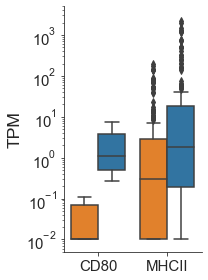

CD80 pvalue- 3e-05
MHCII pvalue- 2.2e-08


In [29]:
plt.figure(figsize=(3,4))
sns.set_style('ticks')
sns.boxplot(x='Gene',y='value',hue='Condition',data=z,hue_order=['lo','hi'],order=['CD80','MHCII'],
           palette=np.vstack((sns.color_palette()[1],sns.color_palette()[0])))
plt.yscale('log')
sns.despine()
plt.ylim([0.005,5000])
plt.legend('',frameon=False)
plt.ylabel('TPM',fontsize=17.5)
plt.yticks([.01,.1,1,10,100,1000],fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('')
sns.despine()
plt.tight_layout()
plt.show()
plt.close()
print(f'CD80 pvalue- {round(stats.mannwhitneyu(z[(z.Condition=="hi") & (z.Gene=="CD80")].value,z[(z.Condition=="lo") & (z.Gene=="CD80")].value)[1],5)}')
print(f'MHCII pvalue- {round(stats.mannwhitneyu(z[(z.Condition=="hi") & (z.Gene=="MHCII")].value,z[(z.Condition=="lo") & (z.Gene=="MHCII")].value)[1],10)}')

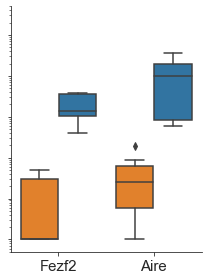

CD80 pvalue- 0.00036
MHCII pvalue- 3.4e-06


In [30]:
plt.figure(figsize=(3,4))
sns.set_style('ticks')
sns.boxplot(x='Gene',y='value',hue='Condition',data=z,hue_order=['lo','hi'],order=['FEZF2','AIRE'],
           palette=np.vstack((sns.color_palette()[1],sns.color_palette()[0])))
plt.yscale('log')
sns.despine()
plt.ylim([0.005,5000])
plt.legend('',frameon=False)
plt.ylabel('',fontsize=17.5)
plt.yticks([.01,.1,1,10,100,1000],'',fontsize=15)
plt.xticks([0,1],['Fezf2','Aire'],fontsize=15)
plt.xlabel('')
sns.despine()
plt.tight_layout()
plt.show()
plt.close()

print(f'CD80 pvalue- {round(stats.mannwhitneyu(z[(z.Condition=="hi") & (z.Gene=="FEZF2")].value,z[(z.Condition=="lo") & (z.Gene=="FEZF2")].value)[1],5)}')
print(f'MHCII pvalue- {round(stats.mannwhitneyu(z[(z.Condition=="hi") & (z.Gene=="AIRE")].value,z[(z.Condition=="lo") & (z.Gene=="AIRE")].value)[1],7)}')

**Figure 3D**

In [31]:
low=['GABRA5','LYPD1','KRT15']
high=['CLEC7A','MARCO','FXYD2','FXYD3','IL4I1','CHI3L1','CD70','TNFRSF9','SPIB']

In [32]:
x=df[df.ext_gene.isin(high)]
x=x[x.qval.astype(str)!='nan']
x['Gene']=x.ext_gene

for i,gene in enumerate(x.Gene.unique()):
    y=df_abundance.loc[x[x.Gene.isin([gene])].target_id]
    y=y.drop(columns='length')
    y['Gene']=[gene]*y.shape[0]
    y=y.melt(id_vars='Gene')
    y['Subject']=np.array([x.split('_')[0] for x in y.variable])
    y['Condition']=np.array([x.split('_')[1] for x in y.variable])
    y.value=y.value+0.01
    if i==0:
        z=y
    else:
        z=z.append(y)

/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_13564/3229081105.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(y)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_13564/3229081105.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(y)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_13564/3229081105.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(y)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_13564/3229081105.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(y)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_13564/3229081

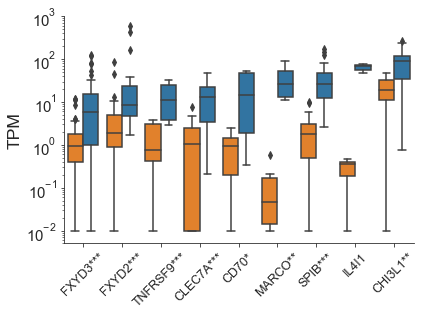

In [33]:
plt.figure(figsize=(6,4.5))
sns.set_style('ticks')
sns.boxplot(x='Gene',y='value',hue='Condition',data=z,hue_order=['lo','hi'],order=z[z.Condition=='hi'].groupby('Gene').median().sort_values(by='value').index,
           palette=np.vstack((sns.color_palette()[1],sns.color_palette()[0])))
plt.yscale('log')
sns.despine()
plt.ylim([0.005,1000])
plt.legend('',frameon=False)
plt.ylabel('TPM',fontsize=17.5)
plt.yticks([.01,.1,1,10,100,1000],fontsize=15)
ps=[]
for x in z[z.Condition=='hi'].groupby('Gene').median().sort_values(by='value').index:
    p=stats.mannwhitneyu(z[(z.Gene==x) & (z.Condition=='hi')].value,
                       z[(z.Gene==x) & (z.Condition=='lo')].value)[1]
    if p<0.001:
        ps.append('***')
    elif p<0.01:
        ps.append('**')
    elif p<0.05:
        ps.append('*')
    else:
        ps.append('')
plt.xticks(np.arange(z.Gene.unique().shape[0]),[x+y for x,y in zip(z[z.Condition=='hi'].groupby('Gene').median().sort_values(by='value').index,ps)],
           fontsize=12.5,rotation=45)
plt.xlabel('')
sns.despine()
plt.tight_layout()
plt.show()
plt.close()

**Figure 4E**

In [34]:
x=pd.read_csv('Figure4_data/gtex_transcripts_binarized_expression.csv')
df['transcript']=[x.split('.')[0] for x in df.target_id]

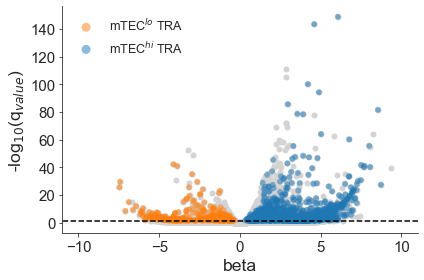

Low transcripts: 374
High transcripts: 1747


In [35]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='b',y='log_qval',data=df,color='lightgray',linewidth=0,alpha=1)
#sns.scatterplot(x='b',y='log_qval',data=df[(df.qval<=0.05) & (df.transcript.isin(x.id))],color='firebrick',edgecolor="none",label='TRA',alpha=0.1)
sns.scatterplot(x='b',y='log_qval',data=df[(df.qval<=0.05) & (df.b<0) & (df.transcript.isin(x.id))],color=sns.color_palette()[1],edgecolor="none",label='mTEC$^{lo}$ TRA',alpha=0.5)
sns.scatterplot(x='b',y='log_qval',data=df[(df.qval<=0.05) & (df.b>0) & (df.transcript.isin(x.id))],color=sns.color_palette()[0],edgecolor="none",label='mTEC$^{hi}$ TRA',alpha=0.5)
plt.plot([-15,15],[-np.log10(0.05),-np.log10(0.05)],'--k')
plt.xlim([-11,11])
plt.ylabel('-log$_{10}$(q$_{value}$)',fontsize=17.5)
plt.xlabel('beta',fontsize=17.5)
plt.xticks([-10,-5,0,5,10],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=False,fontsize=12.5,loc='upper left',markerscale=1.5)
sns.despine()
plt.tight_layout()
plt.show()
plt.close()
print(f'Low transcripts: {df[(df.qval<=0.05) & (df.b<0) & (df.transcript.isin(x.id))].shape[0]}')
print(f'High transcripts: {df[(df.qval<=0.05) & (df.b>0) & (df.transcript.isin(x.id))].shape[0]}')

**Figure 4F**

In [36]:
#Terms from PantherGO
x=['Skeletal muscle fiber adaptation','Pos. reg. skeletal muscle \n development',
         'Muscle cell fate commitment','Muscle filament sliding',
        'Skeletal muscle contraction','Pos. reg. myoblast differentiation',
        'Response to muscle stretch','Skeletal muscle fiber development',
        'Reg. heart contraction force','Sarcomere organization',
        'Skeletal muscle tissue \n regeneration','Cardiac muscle morphogenesis',
        'Skeletal muscle differentiation','Cardiac muscle contraction',
        'Reg. striated muscle contraction','Reg. muscle adaptation']
y=['5e-6','2.4e-3','6.3e-3','1.3e-7','1.5e-3','1.8e-2','1.7e-2','1.9e-2','2.3e-2','2.6e-3','4e-2','7.2e-4','6.1e-3','1.9e-3','4e-3','3.1e-3']
y=np.array(y).astype(float)
y=-np.log10(y)
x=pd.DataFrame(np.vstack((x,y)).T,columns=['Term','FDR'])
x.FDR=x.FDR.astype(float)
x=x.sort_values(by='FDR')

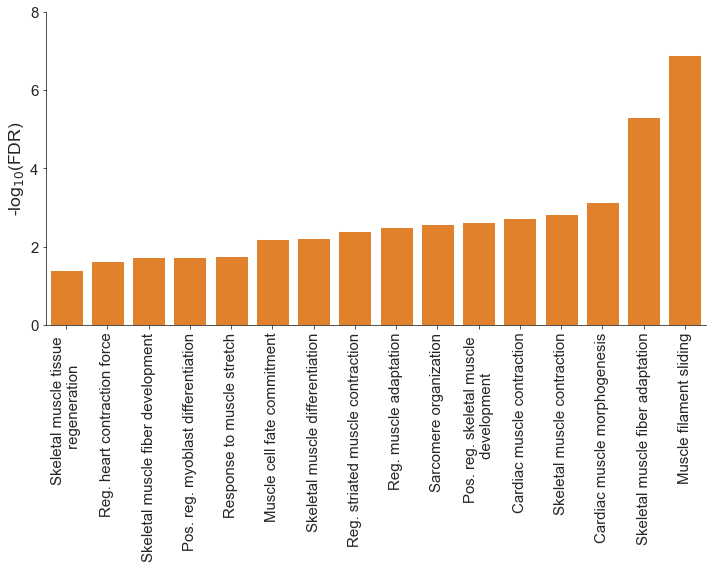

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(y='FDR',x='Term',data=x,palette=[sns.color_palette()[1]])
plt.yticks(fontsize=15)
plt.ylabel('-log$_{10}$(FDR)',fontsize=17.5)
plt.xlabel('')
plt.yticks(np.arange(0,10,2),fontsize=15)
plt.xticks(fontsize=15,rotation=90)
sns.despine()
plt.tight_layout()
plt.show()
plt.close()

**Figure 4G**

In [38]:
df=pd.read_csv('Figure4_data/gtex_genes_binarized_expression.csv',sep=',')
df.index=df.id
sleuth=pd.read_csv('common_data/Sleuth_results_all.txt')
df=df.loc[np.intersect1d(df.index, sleuth.ens_gene.astype(str))]
df_abundance=pd.read_pickle('common_data/Kallisto_abundance.pkl')

In [39]:
genes=pd.DataFrame(np.zeros((df.shape[0],df_abundance.shape[1])),index=df.index,columns=df_abundance.columns)
for x in df.index:
    genes.loc[x]=df_abundance.loc[sleuth[sleuth.ens_gene==x].target_id].sum()

In [40]:
high=['pt214_hi_tpm','pt221_hi_tpm','pt226_hi_tpm']
low=['pt214_lo_tpm','pt221_lo_tpm','pt226_lo_tpm']
for i,x in enumerate(df.columns[2:]):
    h=1*(1*(genes.loc[df[df[x]>0].index][high]>1).sum(axis=1)>0)
    h=sum(h)/len(h)
    l=1*(1*(genes.loc[df[df[x]>0].index][low]>1).sum(axis=1)>0)
    l=sum(l)/len(l)
    if i==0:
        combined=np.hstack((x,h,l,df[df[x]>0].shape[0]))
    else:
        combined=np.vstack((combined,np.hstack((x,h,l,df[df[x]>0].shape[0]))))
combined=pd.DataFrame(combined,columns=['Tissue','High_percentage','Low_percentage','N_genes'])

In [41]:
combined.Tissue=['Adipose','Adrenal Gland','Cerebellum','Frontal Cortex','Spinal Cord','Breast','Colon','Esophagus','Heart','Kidney','Liver','Lung','Skeletal Muscle','Ovary','Pancreas','Prostate','Skin','Small Intestine','Spleen','Stomach','Testis','Thyroid',]
combined['Tissue_Counts']=np.array(combined.Tissue+' ('+combined.N_genes+')')
combined=combined.drop(columns=['Tissue','N_genes'])
combined_genes=combined

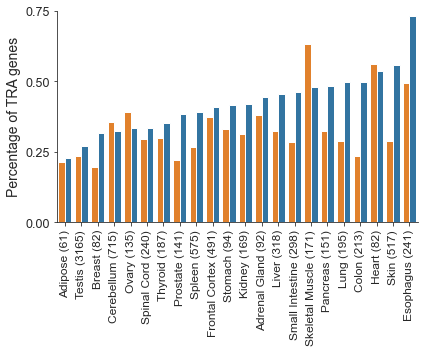

In [42]:
plt.figure(figsize=(6,5))
data=combined.melt(value_vars=['High_percentage','Low_percentage'],id_vars=['Tissue_Counts'])
data.value=data.value.astype(float)
sns.barplot(x='Tissue_Counts',y='value',hue='variable',data=data,
    hue_order=['Low_percentage','High_percentage'],palette=[sns.color_palette()[1],sns.color_palette()[0]],
    order=combined.sort_values(by='High_percentage',ascending=1).Tissue_Counts)
sns.despine()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,rotation=90)
plt.legend('',frameon=False)
plt.ylabel('Percentage of TRA genes',fontsize=14)
plt.xlabel('')
plt.ylim([0,.75])
plt.yticks(np.arange(0,1,.25),fontsize=12.5)
plt.tight_layout()
plt.show()
plt.close()

In [43]:
a=np.sum(1*(1*(genes[high]>1)).sum(axis=1)>0)
b=np.sum(1*(1*(genes[low]>1)).sum(axis=1)>0)
c=genes.shape[0]-a
d=genes.shape[0]-b
gene_or,gene_pv=stats.fisher_exact([[a,b],[c,d]])
gene_lower,gene_upper=sm.stats.Table2x2(np.asarray([[a,b],[c,d]])).oddsratio_confint(alpha=0.05, method='normal')

**Figure 4H**

In [44]:
df=pd.read_csv('Figure4_data/gtex_transcripts_binarized_expression.csv',sep=',')
df.index=df.id
sleuth=pd.read_csv('common_data/Sleuth_results_all.txt')
sleuth.target_id=np.array([x.split('.')[0] for x in sleuth.target_id])
df=df.loc[np.intersect1d(df.index, sleuth.target_id.astype(str))]
genes=pd.read_pickle('common_data/Kallisto_abundance.pkl')
genes.index=np.array([x.split('.')[0] for x in genes.index])
genes=genes[genes.index.isin(df.index)]

In [45]:
high=['pt214_hi_tpm','pt221_hi_tpm','pt226_hi_tpm']
low=['pt214_lo_tpm','pt221_lo_tpm','pt226_lo_tpm']
for i,x in enumerate(df.columns[2:]):
    h=1*(1*(genes.loc[df[df[x]>0].index][high]>1).sum(axis=1)>0)
    h=sum(h)/len(h)
    l=1*(1*(genes.loc[df[df[x]>0].index][low]>1).sum(axis=1)>0)
    l=sum(l)/len(l)
    if i==0:
        combined=np.hstack((x,h,l,df[df[x]>0].shape[0]))
    else:
        combined=np.vstack((combined,np.hstack((x,h,l,df[df[x]>0].shape[0]))))
combined=pd.DataFrame(combined,columns=['Tissue','High_percentage','Low_percentage','N_genes'])

In [46]:
combined.Tissue=['Adipose','Adrenal Gland','Cerebellum','Frontal Cortex','Spinal Cord','Breast','Colon','Esophagus','Heart','Kidney','Liver','Lung','Skeletal Muscle','Ovary','Pancreas','Prostate','Skin','Small Intestine','Spleen','Stomach','Testis','Thyroid',]
combined['Tissue_Counts']=np.array(combined.Tissue+' ('+combined.N_genes+')')
combined=combined.drop(columns=['Tissue','N_genes'])
combined_transcripts=combined

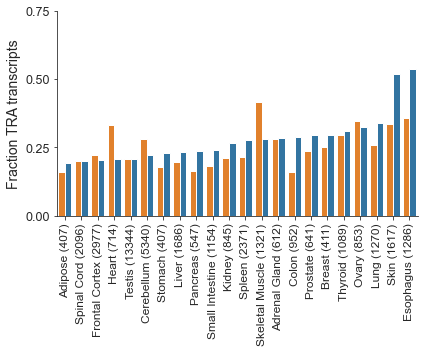

In [47]:
plt.figure(figsize=(6,5))
data=combined.melt(value_vars=['High_percentage','Low_percentage'],id_vars=['Tissue_Counts'])
data.value=data.value.astype(float)
sns.barplot(x='Tissue_Counts',y='value',hue='variable',data=data,
    hue_order=['Low_percentage','High_percentage'],palette=[sns.color_palette()[1],sns.color_palette()[0]],
    order=combined.sort_values(by='High_percentage',ascending=1).Tissue_Counts)
sns.despine()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,rotation=90)
plt.legend('',frameon=False)
plt.ylabel('Fraction TRA transcripts',fontsize=14)
plt.xlabel('')
plt.ylim([0,.75])
plt.yticks(np.arange(0,1,.25),fontsize=12.5)
plt.tight_layout()
plt.show()
plt.close()

In [48]:
a=np.sum(1*(1*(genes[high]>1)).sum(axis=1)>0)
b=np.sum(1*(1*(genes[low]>1)).sum(axis=1)>0)
c=genes.shape[0]-a
d=genes.shape[0]-b
transcript_or,transcript_pv=stats.fisher_exact([[a,b],[c,d]])
transcript_lower,transcript_upper=sm.stats.Table2x2(np.asarray([[a,b],[c,d]])).oddsratio_confint(alpha=0.05, method='normal')

**Figure 4I**

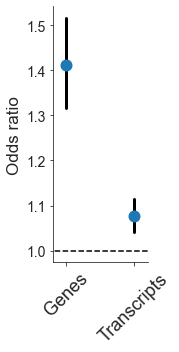

In [49]:
plt.figure(figsize=(2.5,5))
plt.plot([.5,.5],[transcript_lower,transcript_upper],'k',lw=3)
plt.plot([0,0],[gene_lower,gene_upper],'k',lw=3)
plt.scatter([.5,0],[transcript_or,gene_or], lw=6,zorder=5)
plt.plot([-.5,4.5],[1,1],'--k')
plt.xticks([0,.5],['Genes',"Transcripts"])
plt.xlim([-.1,.6])
plt.xticks(rotation=45,fontsize=18)
plt.xlabel('')
plt.legend('',frameon=False)
plt.yticks(fontsize=14)
plt.ylabel('Odds ratio',fontsize=17)
sns.despine()
plt.tight_layout()
plt.show()
plt.close()